<a href="https://colab.research.google.com/github/khalilboumalela/GMC002/blob/main/logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("titanic-passengers.csv" , sep=";")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [ ]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
df["Embarked"]=df["Embarked"].map({"S": 1, "Q": 0,"C":2})   #convert admitted variable into numerical
df.head()

#features extraction
x = df[['Embarked', 'Age','Pclass']]
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

df["Age"].fillna(df["Age"].mean(), inplace=True)
#features extraction
x = df[['SibSp', 'Age','Pclass']]
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))



Accuracy=0.68


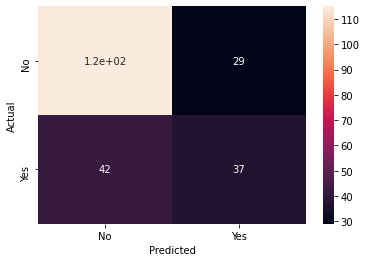

In [ ]:
import seaborn as sns 
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

Une courbe ROC (receiver operating characteristic) est un graphique représentant les performances d'un modèle de classification pour tous les seuils de classification. Cette courbe trace le taux de vrais positifs en fonction du taux de faux positifs :

Taux de vrais positifs
Taux de faux positifs


Une courbe ROC trace les valeurs TVP et TFP pour différents seuils de classification. Diminuer la valeur du seuil de classification permet de classer plus d'éléments comme positifs, ce qui augmente le nombre de faux positifs et de vrais positifs.


AUC signifie "aire sous la courbe ROC". Cette valeur mesure l'intégralité de l'aire à deux dimensions située sous l'ensemble de la courbe ROC (par calculs d'intégrales) de (0,0) à (1,1).

In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

lr_probs = .predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()



AttributeError: 'DataFrame' object has no attribute 'predict_proba'

In [ ]:
y_proba = logreg.predict_proba(x_test) 

In [ ]:
y_proba = logreg.predict_proba(x_test) 
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
print('AUC: %.3f' % auc)

ValueError: y_true takes value in {'No', 'Yes'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [ ]:
y_test


495    Yes
648     No
278    Yes
31      No
255    Yes
      ... 
167     No
306     No
379    Yes
742     No
10      No
Name: Survived, Length: 223, dtype: object

In [ ]:
y_test_=y_test.map({"Yes": 1, "No": 0})   #convert admitted variable into numerical
y_test_

495   NaN
648   NaN
278   NaN
31    NaN
255   NaN
       ..
167   NaN
306   NaN
379   NaN
742   NaN
10    NaN
Name: Survived, Length: 223, dtype: float64

In [ ]:
df["Survived"]=df["Survived"].map({"Yes": 1, "No": 0})   #convert admitted variable into numerical
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,1.0
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,1.0
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,1.0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,1.0
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,1.0


In [ ]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

df["Age"].fillna(df["Age"].mean(), inplace=True)
#features extraction
x = df[['SibSp', 'Age','Pclass']]
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))



Accuracy=0.68


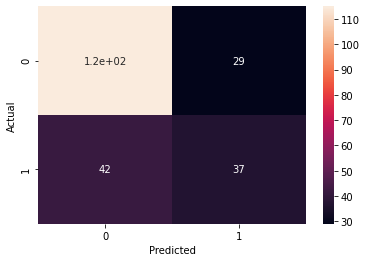

In [ ]:
import seaborn as sns 
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
y_proba = logreg.predict_proba(x_test) 
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.633
